# ***Cell 1: Import Required Libraries and Load Data***

---

This cell imports essential libraries and loads the cleaned dataset. It provides an initial look at the dataset to help confirm the data structure. Common libraries like pandas, sklearn, and matplotlib are used for data handling, model building, and visualization. The seaborn library is also imported for enhanced plotting styles, particularly for the confusion matrix.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Dataset
data = pd.read_csv('Final_cleaned_preprocessed_DataSet.csv')

# Inspect the first few rows
print(data.head())


   type      amount  oldbalanceOrg  newbalanceOrig   isFraud
0     0    76550.74     1096252.93      1172803.66  No Fraud
1     3    12617.11      339181.87       326564.76  No Fraud
2     4    22877.00       22877.00            0.00     Fraud
3     4   182739.36      182739.36            0.00     Fraud
4     1  4738282.28     4738282.28            0.00     Fraud


# ***Cell 2: Data Splitting***

---

The dataset is split into training, validation, and testing sets. X contains the features, and y holds the target variable (isFraud). The data is split in a 70-15-15 ratio, ensuring that training data is used for fitting, the validation set is for tuning and evaluation, and the test set is saved for final model evaluation. This split supports model generalization by preventing data leakage.



In [5]:
# Data Splitting into Training, Validation, and Testing Sets
X = data.drop('isFraud', axis=1)
y = data['isFraud']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# ***Cell 3: Logistic Regression Model and Evaluation***

---

In this cell, a LogisticRegression model is instantiated, trained, and evaluated on the validation set. The confusion matrix for predictions on the validation data is visualized with seaborn to understand how well the model distinguishes between classes. The validation accuracy of the model is calculated and printed to assess its predictive performance.



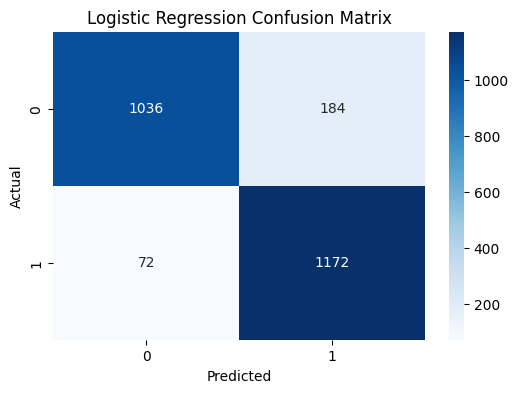

Logistic Regression Validation Accuracy: 0.8961038961038961


In [6]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_val_pred_log_reg = log_reg.predict(X_val)

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print Accuracy
log_reg_acc = accuracy_score(y_val, y_val_pred_log_reg)
print("Logistic Regression Validation Accuracy:", log_reg_acc)


# ***Cell 4: K-Nearest Neighbors Model and Evaluation***

---

This cell trains a KNeighborsClassifier model and visualizes its performance on the validation set. The confusion matrix helps identify how often the model correctly or incorrectly predicts each class. Validation accuracy is also displayed for comparison with other models. KNN is a simple, distance-based algorithm that’s helpful for classifying cases based on similarity to neighbors.



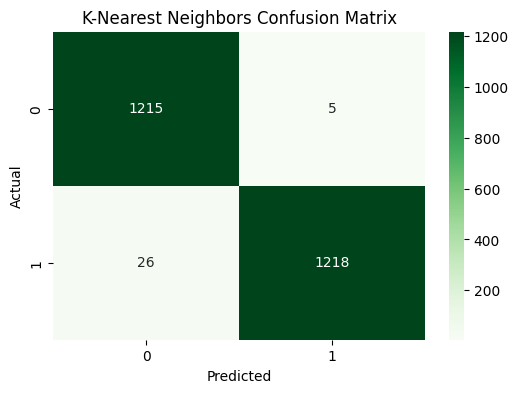

K-Nearest Neighbors Validation Accuracy: 0.9874188311688312


In [7]:
# K-Nearest Neighbors Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_val_pred_knn = knn.predict(X_val)

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Greens')
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print Accuracy
knn_acc = accuracy_score(y_val, y_val_pred_knn)
print("K-Nearest Neighbors Validation Accuracy:", knn_acc)


# ***Cell 5: Decision Tree Classifier Model and Evaluation***

---
Here, a DecisionTreeClassifier is trained and evaluated on the validation set. The confusion matrix for the decision tree classifier provides insights into its class-based predictions. The accuracy score gives a quantitative measure of the model's validation performance. Decision trees are helpful for interpretability since they make decisions based on feature splits.





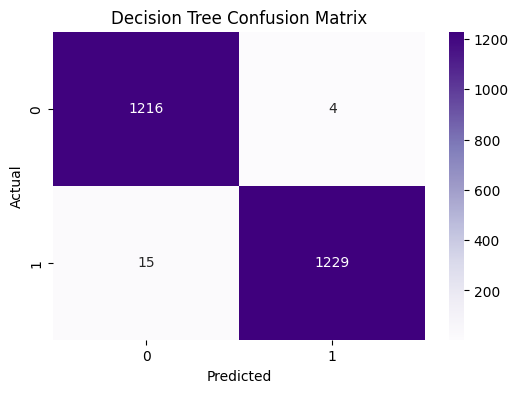

Decision Tree Validation Accuracy: 0.992288961038961


In [8]:
# Decision Tree Classifier Model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_val_pred_tree = decision_tree.predict(X_val)

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred_tree), annot=True, fmt='d', cmap='Purples')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print Accuracy
tree_acc = accuracy_score(y_val, y_val_pred_tree)
print("Decision Tree Validation Accuracy:", tree_acc)


# ***Cell 6: Random Forest Classifier Model, Evaluation, and Feature Importance***

---

This cell uses a RandomForestClassifier, which builds multiple decision trees to improve robustness and accuracy. The confusion matrix and validation accuracy are shown to evaluate its performance on the validation set. Additionally, feature importance is plotted, showing which features have the most impact on model predictions. Feature importance helps identify which factors significantly influence fraud prediction.




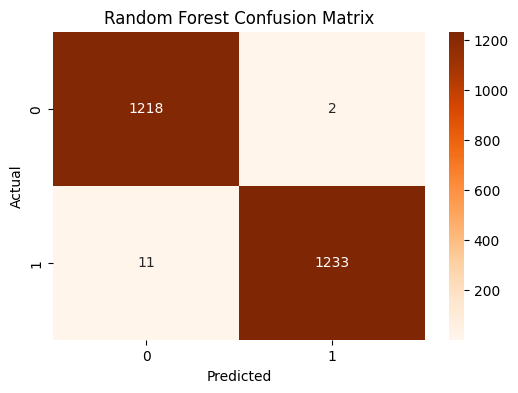

Random Forest Validation Accuracy: 0.994724025974026


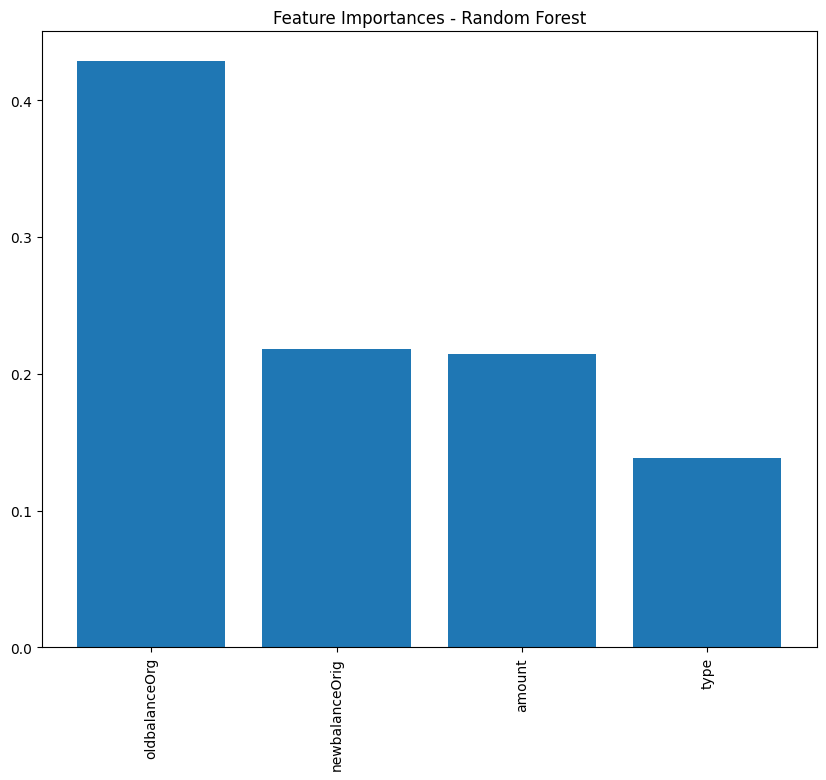

In [9]:
# Random Forest Classifier Model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_val_pred_forest = random_forest.predict(X_val)

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred_forest), annot=True, fmt='d', cmap='Oranges')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print Accuracy
forest_acc = accuracy_score(y_val, y_val_pred_forest)
print("Random Forest Validation Accuracy:", forest_acc)

# Feature Importance Visualization
feature_importances = random_forest.feature_importances_
indices = np.argsort(feature_importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 8))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()


# ***Cell 7: Accuracy Comparison of All Models***

---
This final cell visually compares validation accuracy across all models, giving a clear sense of which model performs best. The seaborn bar plot allows quick assessment of model performance, and the printed accuracy scores summarize each model’s effectiveness. This comparison aids in selecting the best model for fraud detection based on validation accuracy.




<ipython-input-10-eef03d59c309>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


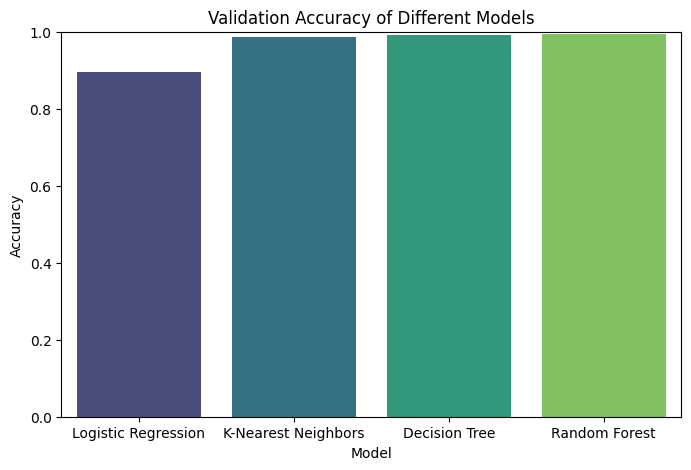

Model Accuracies:
Logistic Regression: 0.8961038961038961
K-Nearest Neighbors: 0.9874188311688312
Decision Tree: 0.992288961038961
Random Forest: 0.994724025974026


In [10]:
# Accuracy Comparison Plot
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest']
accuracies = [log_reg_acc, knn_acc, tree_acc, forest_acc]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title("Validation Accuracy of Different Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Print All Accuracies for Reference
print("Model Accuracies:")
print("Logistic Regression:", log_reg_acc)
print("K-Nearest Neighbors:", knn_acc)
print("Decision Tree:", tree_acc)
print("Random Forest:", forest_acc)


# ***Cell 8: Hyperparameter Tuning for Logistic Regression***




/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optim

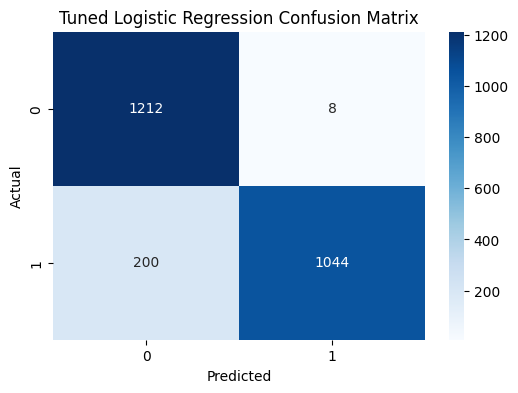

Tuned Logistic Regression Validation Accuracy: 0.9155844155844156


In [11]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tuning for Logistic Regression
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
random_search_log_reg = RandomizedSearchCV(LogisticRegression(max_iter=1000), param_grid_log_reg, cv=3, scoring='accuracy', n_iter=10, random_state=42)
random_search_log_reg.fit(X_train, y_train)

# Best model and evaluation
log_reg_best = random_search_log_reg.best_estimator_
y_val_pred_log_reg_tuned = log_reg_best.predict(X_val)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred_log_reg_tuned), annot=True, fmt='d', cmap='Blues')
plt.title("Tuned Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print Accuracy
log_reg_tuned_acc = accuracy_score(y_val, y_val_pred_log_reg_tuned)
print("Tuned Logistic Regression Validation Accuracy:", log_reg_tuned_acc)


# ***Cell 9: Hyperparameter Tuning for K-Nearest Neighbors***

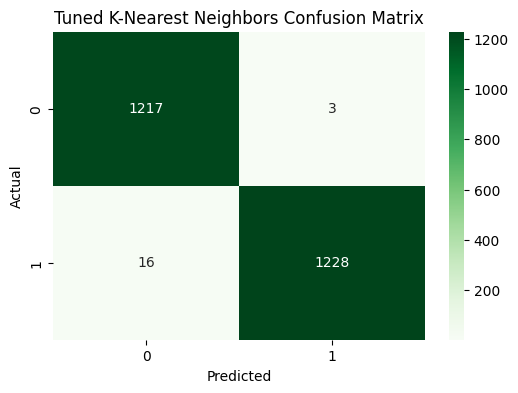

Tuned K-Nearest Neighbors Validation Accuracy: 0.992288961038961


In [12]:
# Hyperparameter tuning for K-Nearest Neighbors
param_grid_knn = {'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance'], 'p': [1, 2]}
random_search_knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_iter=10, random_state=42)
random_search_knn.fit(X_train, y_train)

# Best model and evaluation
knn_best = random_search_knn.best_estimator_
y_val_pred_knn_tuned = knn_best.predict(X_val)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn_tuned), annot=True, fmt='d', cmap='Greens')
plt.title("Tuned K-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print Accuracy
knn_tuned_acc = accuracy_score(y_val, y_val_pred_knn_tuned)
print("Tuned K-Nearest Neighbors Validation Accuracy:", knn_tuned_acc)


# ***Cell 10: Hyperparameter Tuning for Decision Tree Classifier***


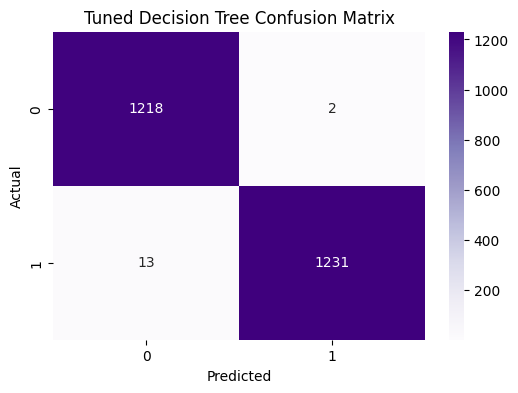

Tuned Decision Tree Validation Accuracy: 0.9939123376623377


In [13]:
# Hyperparameter tuning for Decision Tree
param_grid_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_search_tree = RandomizedSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=3, scoring='accuracy', n_iter=10, random_state=42)
random_search_tree.fit(X_train, y_train)

# Best model and evaluation
tree_best = random_search_tree.best_estimator_
y_val_pred_tree_tuned = tree_best.predict(X_val)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred_tree_tuned), annot=True, fmt='d', cmap='Purples')
plt.title("Tuned Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print Accuracy
tree_tuned_acc = accuracy_score(y_val, y_val_pred_tree_tuned)
print("Tuned Decision Tree Validation Accuracy:", tree_tuned_acc)


# ***Cell 11: Hyperparameter Tuning for Random Forest Classifier***



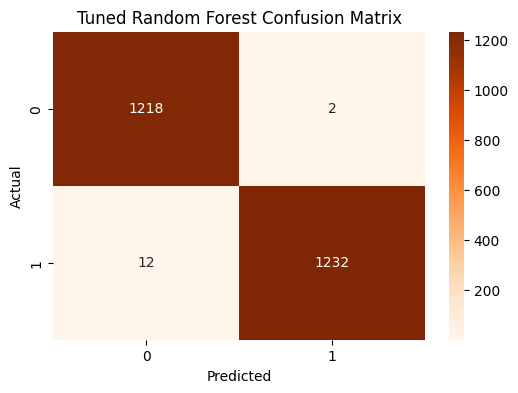

Tuned Random Forest Validation Accuracy: 0.9943181818181818


In [15]:
# Hyperparameter tuning for Random Forest
param_grid_forest = {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10]}
random_search_forest = RandomizedSearchCV(RandomForestClassifier(), param_grid_forest, cv=3, scoring='accuracy', n_iter=10, random_state=42)
random_search_forest.fit(X_train, y_train)

# Best model and evaluation
forest_best = random_search_forest.best_estimator_
y_val_pred_forest_tuned = forest_best.predict(X_val)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred_forest_tuned), annot=True, fmt='d', cmap='Oranges')
plt.title("Tuned Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print Accuracy
forest_tuned_acc = accuracy_score(y_val, y_val_pred_forest_tuned)
print("Tuned Random Forest Validation Accuracy:", forest_tuned_acc)


# ***Cell 12: Accuracy Comparison of Tuned Models with Initial Models***

---
This final cell will compare both the original and tuned accuracies across all models for easy assessment.


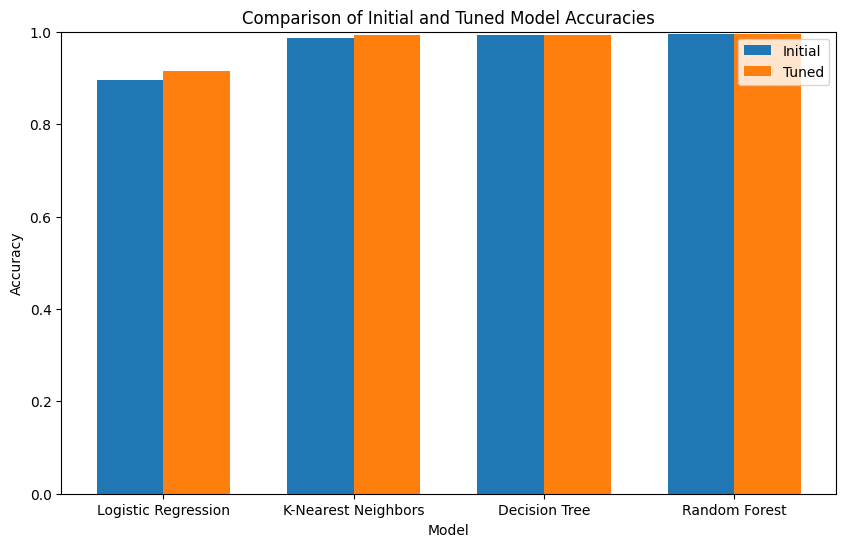

Model Accuracies (Initial vs Tuned):
Logistic Regression - Initial: 0.8961, Tuned: 0.9156
K-Nearest Neighbors - Initial: 0.9874, Tuned: 0.9923
Decision Tree - Initial: 0.9923, Tuned: 0.9939
Random Forest - Initial: 0.9947, Tuned: 0.9943


In [16]:
# Accuracy Comparison Plot for Initial and Tuned Models
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest']
initial_accuracies = [log_reg_acc, knn_acc, tree_acc, forest_acc]
tuned_accuracies = [log_reg_tuned_acc, knn_tuned_acc, tree_tuned_acc, forest_tuned_acc]

plt.figure(figsize=(10, 6))
x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

# Plot Initial and Tuned Accuracies Side-by-Side
plt.bar(x - width/2, initial_accuracies, width, label='Initial')
plt.bar(x + width/2, tuned_accuracies, width, label='Tuned')

# Labeling
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Initial and Tuned Model Accuracies")
plt.xticks(x, model_names)
plt.ylim(0, 1)
plt.legend()
plt.show()

# Print All Accuracies for Reference
print("Model Accuracies (Initial vs Tuned):")
for i, model in enumerate(model_names):
    print(f"{model} - Initial: {initial_accuracies[i]:.4f}, Tuned: {tuned_accuracies[i]:.4f}")


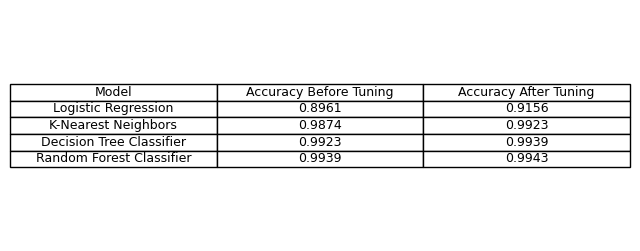

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Actual accuracy values before and after tuning
accuracy_before = {
    'Logistic Regression': 0.8961,
    'K-Nearest Neighbors': 0.9874,
    'Decision Tree Classifier': 0.9923,
    'Random Forest Classifier': 0.9939
}

accuracy_after = {
    'Logistic Regression': 0.9156,
    'K-Nearest Neighbors': 0.9923,
    'Decision Tree Classifier': 0.9939,
    'Random Forest Classifier': 0.9943
}

# Create DataFrame from the dictionaries
data = {
    'Model': list(accuracy_before.keys()),
    'Accuracy Before Tuning': list(accuracy_before.values()),
    'Accuracy After Tuning': list(accuracy_after.values())
}

df = pd.DataFrame(data)

# Displaying the table
fig, ax = plt.subplots(figsize=(8, 3))  # Set figure size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center')

# Adjust layout
plt.show()

# # Print the DataFrame in console
# print(df)


# ***Printing Feature Names from Models***

---
The following code defines a function to print the feature names used in various machine learning models, allowing for verification of the input features during model training.








In [21]:
def print_feature_names(model):
    try:
        # If the model has a 'feature_names_in_' attribute
        if hasattr(model, 'feature_names_in_'):
            print("Feature names used in the model:", model.feature_names_in_)
        else:
            print("This model does not have feature names information.")
    except Exception as e:
        print(f"Error printing feature names: {e}")

# Print feature names for each model
print_feature_names(log_reg_best)
print_feature_names(knn_best)
print_feature_names(tree_best)
print_feature_names(forest_best)


Feature names used in the model: ['type' 'amount' 'oldbalanceOrg' 'newbalanceOrig']
Feature names used in the model: ['type' 'amount' 'oldbalanceOrg' 'newbalanceOrig']
Feature names used in the model: ['type' 'amount' 'oldbalanceOrg' 'newbalanceOrig']
Feature names used in the model: ['type' 'amount' 'oldbalanceOrg' 'newbalanceOrig']


# ***Check Fraud Function***

---
The `check_fraud` function collects transaction details from the user and predicts whether the transaction is fraudulent using multiple machine learning models.








In [25]:
import pandas as pd
from collections import Counter

def check_fraud():
    # Get user input for transaction details
    transaction_type = int(input("Enter transaction type (0 for cash-in, 1 for cash-out, 2 for debit, 3 for payment, 4 for transfer, 5 for deposit): "))
    transaction_amount = float(input("Enter transaction amount: "))
    old_balance = float(input("Enter old balance of origin account: "))
    new_balance = float(input("Enter new balance of origin account: "))

    # Prepare input data for the model with the correct feature names and order
    input_data = pd.DataFrame({
        'type': [transaction_type],            # Use 'type' first
        'amount': [transaction_amount],        # Then 'amount'
        'oldbalanceOrg': [old_balance],        # Then 'oldbalanceOrg'
        'newbalanceOrig': [new_balance]        # Finally 'newbalanceOrig'
    })

    # Get predictions from each model
    pred_log_reg = log_reg_best.predict(input_data)[0]
    pred_knn = knn_best.predict(input_data)[0]
    pred_tree = tree_best.predict(input_data)[0]
    pred_forest = forest_best.predict(input_data)[0]

    # Output predictions
    print(f"Logistic Regression Prediction: {'Fraud' if pred_log_reg == 1 else 'Not Fraud'}")
    print(f"K-Nearest Neighbors Prediction: {'Fraud' if pred_knn == 1 else 'Not Fraud'}")
    print(f"Decision Tree Prediction: {'Fraud' if pred_tree == 1 else 'Not Fraud'}")
    print(f"Random Forest Prediction: {'Fraud' if pred_forest == 1 else 'Not Fraud'}")

    # Collect all predictions
    predictions = [pred_log_reg, pred_knn, pred_tree, pred_forest]

    # Determine the most common prediction
    most_common_prediction = Counter(predictions).most_common(1)[0][0]

    # Print the final decision
    final_decision = 'Fraud' if most_common_prediction == 1 else 'Not Fraud'
    print(f"Final Decision: {final_decision}")

# Example of how to call the function
check_fraud()


Enter transaction type (0 for cash-in, 1 for cash-out, 2 for debit, 3 for payment, 4 for transfer, 5 for deposit): 1
Enter transaction amount: 1000
Enter old balance of origin account: 10000
Enter new balance of origin account: 9000
Logistic Regression Prediction: Not Fraud
K-Nearest Neighbors Prediction: Not Fraud
Decision Tree Prediction: Not Fraud
Random Forest Prediction: Not Fraud
Final Decision: Not Fraud


# ***New Model training using Tensor Flow***

---

import tensorflow lib

In [39]:
pip install tensorflow


# ***Import Required Libraries (same as before):***

---



In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# ***Prepare Your Dataset (same as before):***

---



In [30]:
# Create a synthetic dataset (replace this with your data loading)
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)


# ***Split the Dataset:***

---
First, split the data into training and temporary sets (which will be split into validation and testing).
Then, split the temporary set into validation and testing sets


In [31]:
# First split: 70% train, 30% temporary (to be split into valid and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: 50% valid, 50% test of the temporary set (30%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now we have:
# X_train, y_train -> 70%
# X_val, y_val -> 15%
# X_test, y_test -> 15%


# ***Standardize Features (same as before):***

---



In [32]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# ***Build the Neural Network Model (same as before):***

---



In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# ***Compile the Model (same as before):***

---



In [34]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# ***Train the Model with Validation Set:***

---



In [35]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5664 - loss: 0.6748 - val_accuracy: 0.7333 - val_loss: 0.5750
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7961 - loss: 0.5418 - val_accuracy: 0.7933 - val_loss: 0.4841
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8295 - loss: 0.4614 - val_accuracy: 0.7933 - val_loss: 0.4285
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8682 - loss: 0.3775 - val_accuracy: 0.8067 - val_loss: 0.3923
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8814 - loss: 0.3262 - val_accuracy: 0.8000 - val_loss: 0.3717
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8870 - loss: 0.3138 - val_accuracy: 0.8133 - val_loss: 0.3581
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8982 - loss: 0.2814 - val_accuracy: 0.8067 - val_loss: 0.3529
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9095 - loss: 0.2647 - val_accuracy: 0.8400 - val_lo

# ***Evaluate the Model on the Test Set:***

---



In [36]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8570 - loss: 0.3991 
Test Accuracy: 0.8600


# ***Make Predictions (same as before):***

---



In [37]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class predictions


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


# ***Additional Code for Plotting the Confusion Matrix***

---



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


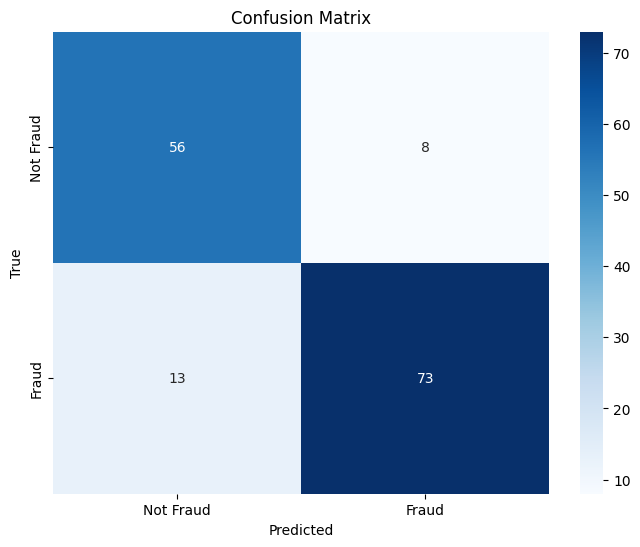

In [38]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary class predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
